### NLP - Homework 6

#### Paritosh Rai¶

#### 1.	Evaluate text similarity of Amazon book search results by doing the following:

In [15]:
# ignore warnnings
#https://queirozf.com/entries/suppressing-ignoring-warnings-in-python-reference-and-examples

import warnings

warnings.filterwarnings('ignore')

# no warnings will be printed from now on

In [16]:
#import required packages
import nltk
from nltk import word_tokenize
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt #to plot bar chart and heatmap

 #### a. Do a book search on Amazon. Manually copy the full book title (including subtitle) of each of the top 24 books listed in the first two pages of search results.

In [17]:
# Manually creat fiction book list from Amazon of the top 24 books. 
# https://www.amazon.com/s?k=friction+books&i=stripbooks&ref=nb_sb_noss_2
# copiled the serach to word doc and cleaned the doc to create the list. 


fiction_books = ["Asher",
"The Remnant Son: Journeys of the Remnant Book 2", 
"Time Tunnel: The Twin Towers", 
"Slow Brewing Tea",
"The Couple Next Door: A Novel",
"I Am Watching",
"The Beach House (South Carolina Sunsets Book 1)",
"All the Ugly and Wonderful Things: A Novel",
"The Silent Patient", 
"When We Believed in Mermaids: A Novel",
"When the Apricots Bloom",
"Mary Amazon: a novel",
"The Indigo Girl: A Novel",
"The Beekeeper Aleppo: A Novel",
"Sold on a Monday: A Novel",
"The Silent Wife: A gripping emotional page turner with a twist that will take your breath away", 
"The Book Woman of Troublesome Creek: A Novel",
"The Alice Network: A Novel", 
"The Last Anniversary: A Novel", 
"The Other Emily",
"The Indigo Girl: A Novel",
"What Comes After: A Novel",
"The Last Thing He Told Me: A Novel",
"Before She Disappeared: A Novel"]


In [18]:
# we have right number of titles
print("Total number of titles:", len(fiction_books))

Total number of titles: 24


#### b.	In Python, run one of the text-similarity measures covered in this course, e.g., cosine similarity. Compare each of the book titles, pairwise, to every other one. 

In [19]:
# Ref: https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50

#With cosine similarity, we need to convert sentences into vectors. 
#One way to do that is to use bag of words with either TF (term frequency) or 
#TF-IDF (term frequency- inverse document frequency). 
#TF is good for text similarity in general, but TF-IDF is good for search query relevance.

# Define function to calculate the cosine similarity
def get_cosine_sim(*strs): 
    vectors = [t for t in get_vectors(*strs)]
    return cosine_similarity(vectors)

# define function to convert string to vector    
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [20]:
# caculate cosine similarity among 24 titles
title_sim_fict = get_cosine_sim("Asher",
"The Remnant Son: Journeys of the Remnant Book 2", 
"Time Tunnel: The Twin Towers", 
"Slow Brewing Tea",
"The Couple Next Door: A Novel",
"I Am Watching",
"The Beach House (South Carolina Sunsets Book 1)",
"All the Ugly and Wonderful Things: A Novel",
"The Silent Patient", 
"When We Believed in Mermaids: A Novel",
"When the Apricots Bloom",
"Mary Amazon: a novel",
"The Indigo Girl: A Novel",
"The Beekeeper Aleppo: A Novel",
"Sold on a Monday: A Novel",
"The Silent Wife: A gripping emotional page turner with a twist that will take your breath away", 
"The Book Woman of Troublesome Creek: A Novel",
"The Alice Network: A Novel", 
"The Last Anniversary: A Novel", 
"The Other Emily",
"The Indigo Girl: A Novel",
"What Comes After: A Novel",
"The Last Thing He Told Me: A Novel",
"Before She Disappeared: A Novel")



In [21]:
print("Pair-wise cosine similarities for Fiction titles are:\n", title_sim_fict)

Pair-wise cosine similarities for Fiction titles are:
 [[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.25819889 0.         0.25819889 0.
  0.32732684 0.21821789 0.33333333 0.         0.28867513 0.
  0.28867513 0.28867513 0.         0.1490712  0.43643578 0.28867513
  0.28867513 0.33333333 0.28867513 0.         0.21821789 0.        ]
 [0.         0.25819889 1.         0.         0.2        0.
  0.16903085 0.16903085 0.25819889 0.         0.2236068  0.
  0.2236068  0.2236068  0.         0.11547005 0.16903085 0.2236068
  0.2236068  0.25819889 0.2236068  0.         0.16903085 0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

#### c.	Which two titles are the most similar to each other? Which are the most dissimilar? Where do they rank, among the first 24 results?

In [22]:
# In above table value 1 are in diagonal or array. That is expected as strings are compared with it self. 
# Remove or mask the value of 1 (>= 1) to remove from ploting to find similarity.
m_title_sim_fict = np.ma.MaskedArray(title_sim_fict, np.around(title_sim_fict, 2) >=1)

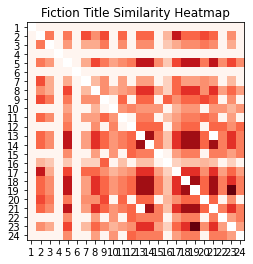

In [23]:

#then we will plot the heat map; we will use title numbers for axex, as the titles are too long
title_nums = [*range(1,25)]
plt.clf()
plt.imshow(m_title_sim_fict, cmap='Reds')
plt.xticks(np.arange(len(title_nums)), title_nums)
plt.yticks(np.arange(len(title_nums)), title_nums)
plt.title("Fiction Title Similarity Heatmap")
plt.show()

##### Maximum Cosine Similarity
Title 19 and 23 show maximum cosine similrity with a score of 0.56694671. 

19: "**The Last** Anniversary **: A Novel**"

23: "**The Last** Thing He Told Me **: A Novel**"



In [24]:
#find maximum value
max_value = np.max(m_title_sim_fict)
print('Maximum value of the array is',max_value)

Maximum value of the array is 0.5669467095138407


In [25]:
# find location of maximu of cosine value in the array
loc_max_value = np.where(m_title_sim_fict == np.amax(m_title_sim_fict))
print('List of Indices of maximum cosine element :', loc_max_value)


List of Indices of maximum cosine element : (array([18, 22], dtype=int64), array([22, 18], dtype=int64))


Indeces startes from 0, so it will be **19th row and 23rd column** and **23rd row and 19th column**. 

#### Most Dissimilar Cosine Similarity

##### Most Dissimilar Cosine Similarity
Looking at array there are lot of zeros showing dissimilarities.

Title 1, 4 and 6 appears to be very dissimilar from other titles:

1: "Asher"

4: "Slow Brewing Tea"

6: "I Am Watching"

In [26]:
# Adding sum of rows aligns with visiual graph
np.sum(m_title_sim_fict,axis=1).tolist()

[0.0,
 4.264384848527811,
 3.1078309133620956,
 0.0,
 5.844550923781254,
 0.0,
 2.9047363154684867,
 4.991894496388329,
 4.086129211673809,
 2.718303803204231,
 3.6523915354083627,
 3.4579558976091573,
 5.981620177266995,
 6.481620177266995,
 3.033352787090564,
 1.9921816000966905,
 5.352969529481465,
 6.481620177266995,
 6.67060241377161,
 3.9370580131738224,
 5.981620177266995,
 3.033352787090564,
 5.180876732892942,
 3.033352787090564]

There are three rows showing lowest score, row 1,4 and 6 shows zero (0) similarity score. These three titles are not very similar with other titles. This outcomes aligns with visiual comparision of outcome. 

#### 2.	Now evaluate using a major search engine.

Submit all of your inputs and outputs and your code for this assignment, along with a brief written explanation of your findings. 


#### a.	Enter one of the book titles from question 1a into Google, Bing, or Yahoo!. Copy the capsule of the first organic result and the 20th organic result. Take web results only (i.e., not video results), and skip sponsored results. 

**Searching in google:** "The Silent Wife: A gripping emotional page turner with a twist that will take your breath away"  from list of book in 1a. 

**1st orginic result :** "The Silent Wife: A gripping emotional page turner with a twist that will take your breath away -"

**20th orginic result :** "Read The Silent Wife A gripping emotional page turner with a twist that will take your breath..."

#### b.	Run the same text similarity calculation that you used for question 1b on each of these capsules in comparison to the original query (book title). 

In [27]:
# comparison of 1st and 20th results found from google results
google_comp_1_20 = get_cosine_sim("The Silent Wife: A gripping emotional page turner with a twist that will take your breath away -",
                                  "Read The Silent Wife A gripping emotional page turner with a twist that will take your breath...")


print("Pair-wise cosine similarities of two titles 1st and 20th:\n", google_comp_1_20)


cosine_similarity_title_cap =get_cosine_sim("The Silent Wife: A gripping emotional page turner with a twist that will take your breath away",
                                            "The Silent Wife: A gripping emotional page turner with a twist that will take your breath away -",
                                            "Read The Silent Wife A gripping emotional page turner with a twist that will take your breath...")

print("Pair-wise cosine similarities for fiction titles among title and 1st and 20th capsules are:\n", cosine_similarity_title_cap)

Pair-wise cosine similarities of two titles 1st and 20th:
 [[1.         0.93333333]
 [0.93333333 1.        ]]
Pair-wise cosine similarities for fiction titles among title and 1st and 20th capsules are:
 [[1.         1.         0.93333333]
 [1.         1.         0.93333333]
 [0.93333333 0.93333333 1.        ]]


#### c.	Which one has the highest similarity measure? 

1st search results show 100% cosine similarity, and 20th show 93% similarity with the title. This is aligned with expectation and demonstrates cosine similarity show reliable results. 